# The One Goal for Today

To implement and train from hidden to output of a RBF network using python.

# Review

Here is what a RBF network looks like:

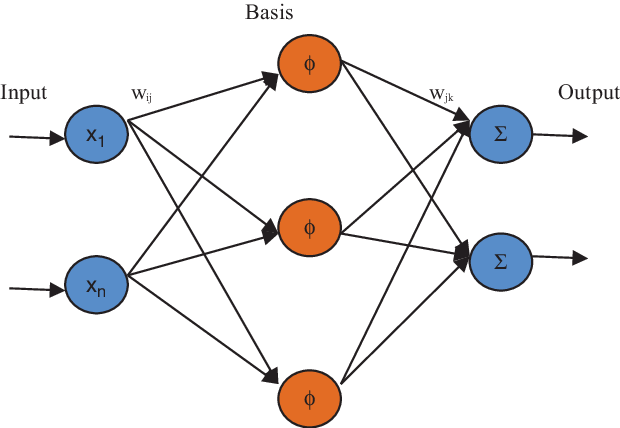

*Image source: https://www.researchgate.net/figure/Structure-of-radial-basis-function-neural-network_fig1_330557075*

Q: *With the car logo dataset, what are we doing to the data before the input nodes?*

Q: *For the car logo dataset, how many input nodes are there?*

Q: *What are the edge weights for the edges between the input and hidden nodes in our network?*

Q: *How did we select the number of hidden nodes for the car logo dataset, and how many did we select?*

Q: *Each hidden node implements a nonlinear activation function. What is the nature of this function?*

Q: *Coming out of the hidden nodes, each data point is represented by how many numbers?*

Q: *For this dataset, how many output nodes will we have?*

# From the Hidden Layer to the Output Layer

Below I load the output of the hidden layer for the iris training data. 

In [ ]:
import numpy as np
import pickle as pkl

In [ ]:
train_calcs = pkl.load(open("../hidden_node_weights_train.pkl",'rb'))
print(train_calcs.shape)
train_y = pkl.load(open("../labels_train.pkl",'rb'))
print(train_y.shape)
print(train_calcs[0])

So now I have:
* A matrix of "feature values" $A$
* A 1-dim matrix of weights to be learned $c$
  * And one of those weights is for a special 'bias' node
* A set of output classes $y$

Q: *What is the shape of the weights matrix $c$?*

Q: *What does this kind of look like?*

## Linear regression to fit categorical data

Okay, our problem is that the $y$'s here are *categorical* - they are *qualitative nominal*. 

__But__, each output node is only concerned with *one* value for $y$, so what if at the $ith$ output node I give the $ith$ $y$ value 1, and *all the other $ys$* value 0? Would that work?

Let's do it for the class labeled '0'.

In [ ]:
from sklearn.linear_model import LinearRegression

A = train_calcs
y = [1 if x == 0 else 0 for x in train_y]
print(y)
reg = LinearRegression().fit(A, y)
print(reg.coef_, reg.intercept_)

## How do we know how well it works?

Let's test it on the dev data.

In [ ]:
test_calcs = pkl.load(open("../hidden_node_weights_test.pkl",'rb'))
print(test_calcs.shape)
test_y = pkl.load(open("../labels_test.pkl",'rb'))
print(test_y)

When we *predict*, we will get a floating point value out of the output node. To convert this back to a label, we should round it. 

Q: What will the size of the array output from reg.predict be?

In [ ]:
test_pred = reg.predict(test_calcs)
print(test_pred)

Q: How well did this output node predict class '0'?

In [ ]:
print(np.abs(np.round(test_pred)))
print(test_y)

## Linear regression for all output nodes of a RBF network

Q: *How many linear regressions do we need to fit for the car logo dataset?*

Q: *For each linear regression, what will change?*
* in the inputs $A$
* in the weights $c$
* in the outputs $y$

You try for the other 15 classes.

## Prediction with a RBF network

So now I have multiple output predictions for each input, one from each output node. How do I select among them?

Let's implement that!

In [ ]:
def final_prediction(input_predictions):
    return np.abs(np.round(np.argmax(input_predictions)))

print(test_pred[0])
print(final_prediction(test_pred[0]))
print([final_prediction(test_pred[i]) for i in range(test_pred.shape[0])])
print(test_y)

# RBF Networks for Regression

What if, instead of predicting the manufacturer for the car logo dataset, I wanted to predict price for the used car dataset?

Q: *What is the type of that variable?*

Q: *Could I fit a linear regression to that? How many regressions would I need to fit?*

Q: *What would change about fitting the hidden layer?*

# RBF Networks Review

First, __look at your data__:
* what are your independent and dependent variables?
* what are their types?
* do you need to transform or normalize your data?
* do you need dimensionality reduction?

To __fit__:
* first, fit the hidden layer
  * use kmeans to get prototypes
  * compute the distance between each data point in the training data and each prototype
  * compute activation function for each prototype using these distances
* second, 
  * if __classification__: fit the output layer and the edge weights to the output layer using linear regression *for each value of the dependent variable separately*
  * if __regression__: fit the output layer and the edge weights to the output layer using regression *to the dependent variable*
  
Before you predict, do whatever preprocessing you did to the training data.

To __predict__:
* first, pass each data point through the hidden layer nodes
  * compute the distance between each data point in the data and each prototype
  * compute activation function for each prototype using these distances
* second, pass these activations $A$ through the output layer nodes
  * if __classification__: calculate argmax $A*c_i$ (where $c_i$ is the edge weights, including that for the bias node, for the $i$th output node)
  * if __regression__: calculate $A*c$